In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv('/Users/hjama/ai-learning/rpp/data/raw/Global WFP Food Prices.csv')
print(df.shape)
df.head()

(3109617, 17)


,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21
2,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33
3,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20
4,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22


In [66]:
df = df.drop_duplicates()
df = df[df['commodity'].str.contains('rice', case=False, na=False)]


In [67]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

country_code
['BGD' 'COL' 'GTM' 'IND' 'MEX']
90

date
['2000-01-15' '2000-07-15' '2000-08-15' '2000-09-15' '2000-10-15']
309

county
['Dhaka' 'Atlántico' 'Bogotá, D.c.' 'Antioquia' 'Guatemala']
839

subcounty
['Dhaka' 'Distrito Especial, Industrial Y Portuario De Barranquilla'
 'Bogotá, D.c.' 'Medellín' 'Guatemala']
2339

market
['Dhaka' 'Barranquilla' 'Bogota' 'Medellin' 'La Terminal']
3962

market_id
[2574  845  840  842 1145]
3987

latitude
[23.81 10.96  4.6   6.29 14.62]
2705

longitude
[ 90.41 -74.8  -74.08 -75.54 -90.52]
2953

category
['cereals and tubers']
1

commodity
['Rice (coarse, BR-8/ 11/, Guti Sharna)' 'Rice (high quality)'
 'Rice (ordinary, second quality)' 'Rice (medium quality)'
 'Rice (ordinary, first quality)']
71

commodity_id
[588 247 198 753 197]
71

unit
['100 KG' 'KG' '100 Pounds' '46 KG' 'Pound']
21

price_flag
['actual' 'aggregate' 'actual,aggregate']
3

price_type
['Wholesale' 'Retail' 'Farm Gate' 'Producer']
4

currency
['BDT' 'COP' 'GTQ' 'INR' 'MXN']
77

l

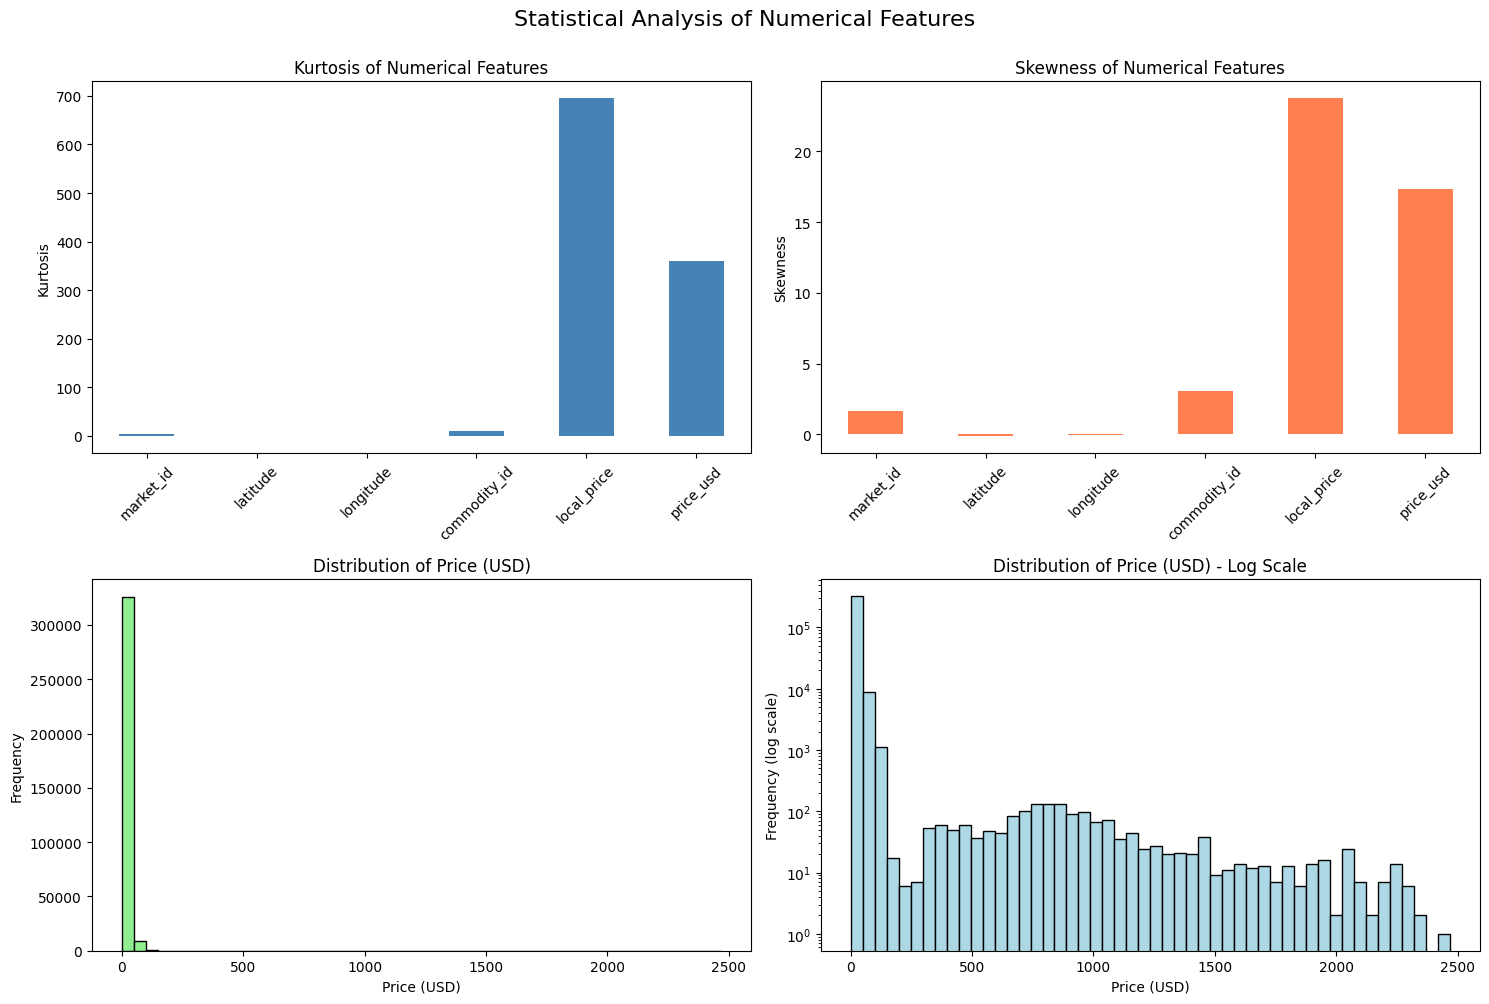

In [68]:
# Create subplots for statistical distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Kurtosis
df.kurtosis(numeric_only=True).plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Kurtosis of Numerical Features')
axes[0, 0].set_ylabel('Kurtosis')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Skewness
df.skew(numeric_only=True).plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Skewness of Numerical Features')
axes[0, 1].set_ylabel('Skewness')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Histogram of price_per_kg_usd
axes[1, 0].hist(df['price_usd'], bins=50, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Distribution of Price (USD)')
axes[1, 0].set_xlabel('Price (USD)')
axes[1, 0].set_ylabel('Frequency')

# 4. Histogram with log scale (better for skewed data)
axes[1, 1].hist(df['price_usd'], bins=50, edgecolor='black', color='lightblue')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Distribution of Price (USD) - Log Scale')
axes[1, 1].set_xlabel('Price (USD)')
axes[1, 1].set_ylabel('Frequency (log scale)')

plt.suptitle('Statistical Analysis of Numerical Features', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

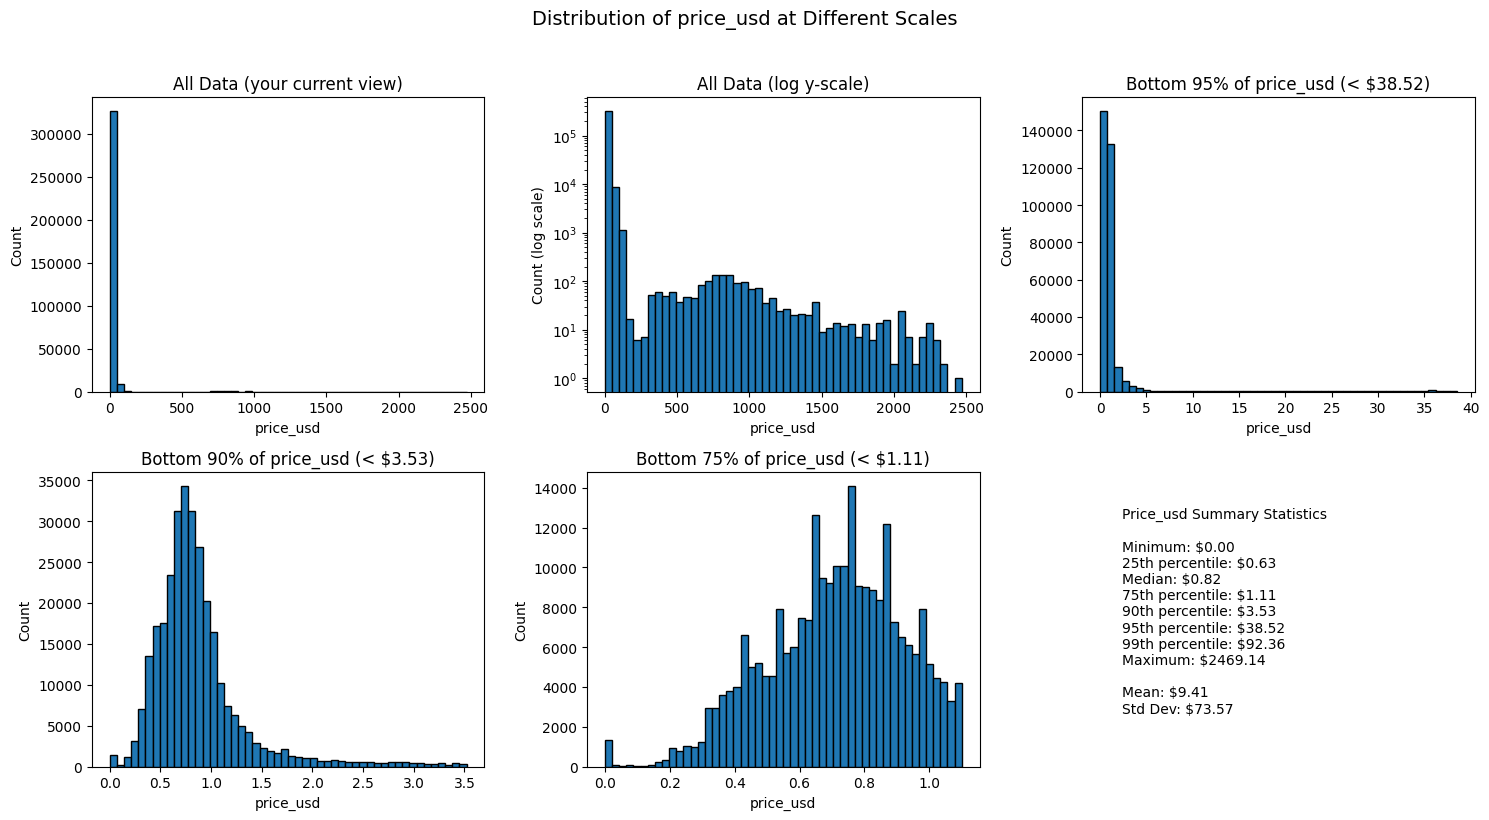

In [69]:
# Create subplots to see the distribution at different scales
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 1. Your current view - all data
axes[0,0].hist(df['price_usd'], bins=50, edgecolor='black')
axes[0,0].set_title('All Data (your current view)')
axes[0,0].set_xlabel('price_usd')
axes[0,0].set_ylabel('Count')

# 2. Log scale on y-axis to see outliers
axes[0,1].hist(df['price_usd'], bins=50, edgecolor='black')
axes[0,1].set_yscale('log')
axes[0,1].set_title('All Data (log y-scale)')
axes[0,1].set_xlabel('price_usd')
axes[0,1].set_ylabel('Count (log scale)')

# 3. Zoom in on majority - remove top 5%
price_95 = df['price_usd'].quantile(0.95)
axes[0,2].hist(df[df['price_usd'] < price_95]['price_usd'], bins=50, edgecolor='black')
axes[0,2].set_title(f'Bottom 95% of price_usd (< ${price_95:.2f})')
axes[0,2].set_xlabel('price_usd')
axes[0,2].set_ylabel('Count')

# 4. Zoom in more - remove top 10%
price_90 = df['price_usd'].quantile(0.90)
axes[1,0].hist(df[df['price_usd'] < price_90]['price_usd'], bins=50, edgecolor='black')
axes[1,0].set_title(f'Bottom 90% of price_usd (< ${price_90:.2f})')
axes[1,0].set_xlabel('price_usd')
axes[1,0].set_ylabel('Count')

# 5. Focus on median range
price_75 = df['price_usd'].quantile(0.75)
axes[1,1].hist(df[df['price_usd'] < price_75]['price_usd'], bins=50, edgecolor='black')
axes[1,1].set_title(f'Bottom 75% of price_usd (< ${price_75:.2f})')
axes[1,1].set_xlabel('price_usd')
axes[1,1].set_ylabel('Count')

# 6. Show summary statistics
stats_text = f"""Price_usd Summary Statistics

Minimum: ${df['price_usd'].min():.2f}
25th percentile: ${df['price_usd'].quantile(0.25):.2f}
Median: ${df['price_usd'].median():.2f}
75th percentile: ${df['price_usd'].quantile(0.75):.2f}
90th percentile: ${df['price_usd'].quantile(0.90):.2f}
95th percentile: ${df['price_usd'].quantile(0.95):.2f}
99th percentile: ${df['price_usd'].quantile(0.99):.2f}
Maximum: ${df['price_usd'].max():.2f}

Mean: ${df['price_usd'].mean():.2f}
Std Dev: ${df['price_usd'].std():.2f}
"""
axes[1,2].text(0.1, 0.5, stats_text, transform=axes[1,2].transAxes, 
               fontsize=10, verticalalignment='center')
axes[1,2].axis('off')

plt.suptitle('Distribution of price_usd at Different Scales', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

INVESTIGATING EXTREME PRICE OUTLIERS

Top 20 highest prices:
         price_usd commodity           market        date unit  local_price  \
1434125    2469.14      Rice         Al Balad  2020-05-15   MT   1266666.67   
1433915    2365.58      Rice        Al Tabqah  2020-05-15   MT   1213541.73   
1434152    2339.18      Rice            Dar'a  2020-05-15   MT   1200000.00   
1429014    2298.85      Rice       Al Makhrim  2020-03-15   MT   1000000.00   
1429019    2298.85      Rice        Ar-Rastan  2020-03-15   MT   1000000.00   
1429024    2298.85      Rice           Ekrema  2020-03-15   MT   1000000.00   
1429029    2298.85      Rice          Inshaat  2020-03-15   MT   1000000.00   
1430221    2279.69      Rice        Ein Terma  2020-03-15   MT    991666.67   
1431699    2279.69      Rice        Ein Terma  2020-02-15   MT    991666.67   
1432738    2226.12      Rice     As-Salamiyeh  2020-04-15   MT   1142000.01   
1432766    2226.12      Rice  As-Suqaylabiyah  2020-04-15   MT   11420

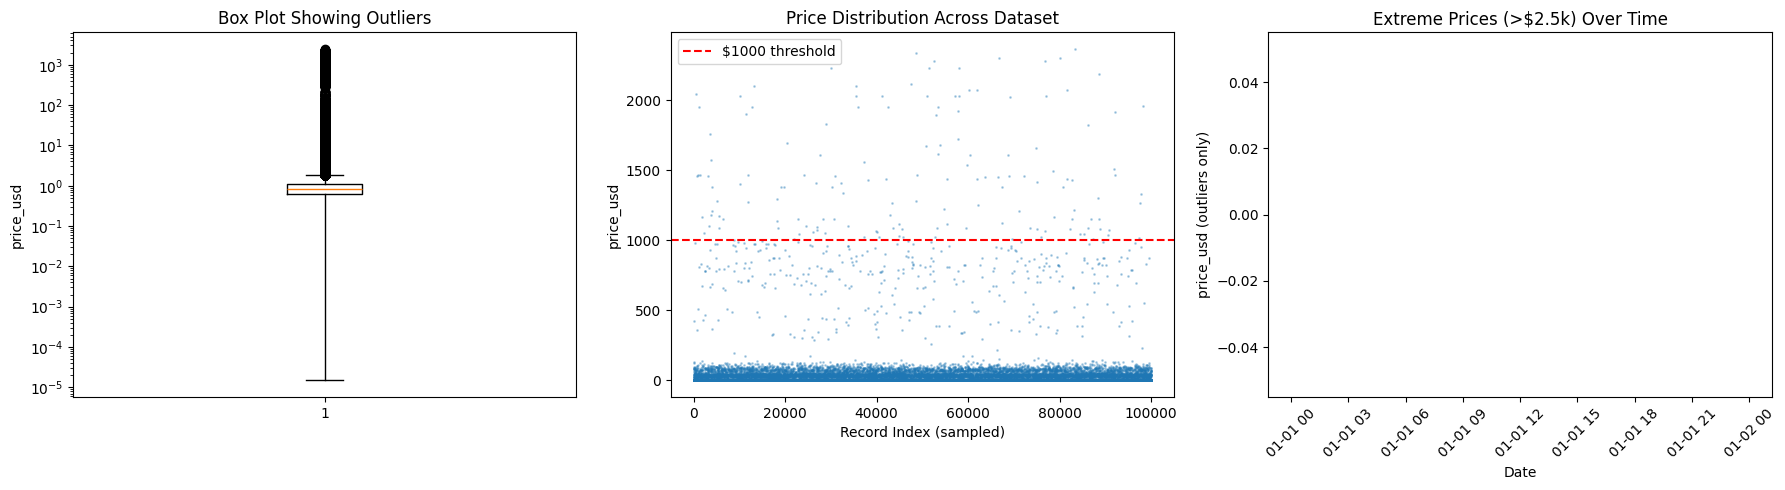


OUTLIERS BY CATEGORY
                    count         mean      max
category                                       
cereals and tubers    524  1432.219943  2469.14


In [70]:
# 1. Find the extreme outliers
print("=" * 60)
print("INVESTIGATING EXTREME PRICE OUTLIERS")
print("=" * 60)

# Look at the top prices
print("\nTop 20 highest prices:")
top_prices = df.nlargest(20, 'price_usd')[['price_usd', 'commodity', 'market', 'date', 'unit', 'local_price', 'currency']]
print(top_prices)

# Check prices over certain thresholds
print("\n" + "=" * 60)
print("PRICE DISTRIBUTION BY THRESHOLD")
print("=" * 60)
print(f"Prices > $1,000: {(df['price_usd'] > 1000).sum():,} records")
print(f"Prices > $10,000: {(df['price_usd'] > 10000).sum():,} records")
print(f"Prices > $50,000: {(df['price_usd'] > 50000).sum():,} records")
print(f"Prices > $100,000: {(df['price_usd'] > 100000).sum():,} records")

# 2. Examine the actual extreme records in detail
print("\n" + "=" * 60)
print("DETAILED VIEW OF PRICES > $10,000")
print("=" * 60)
extreme_prices = df[df['price_usd'] > 10000].sort_values('price_usd', ascending=False)
print(f"\nFound {len(extreme_prices)} records with price > $10,000")
print("\nFirst 10 extreme cases:")
print(extreme_prices[['date', 'market', 'commodity', 'price_usd', 'unit', 'local_price', 'currency']].head(10))

# 3. Check if certain commodities or markets have these outliers
print("\n" + "=" * 60)
print("OUTLIERS BY COMMODITY")
print("=" * 60)
outlier_commodities = df[df['price_usd'] > 1000].groupby('commodity')['price_usd'].agg(['count', 'mean', 'max'])
print(outlier_commodities.sort_values('max', ascending=False))

print("\n" + "=" * 60)
print("OUTLIERS BY MARKET")
print("=" * 60)
outlier_markets = df[df['price_usd'] > 1000].groupby('market')['price_usd'].agg(['count', 'mean', 'max'])
print(outlier_markets.sort_values('max', ascending=False).head(10))

# 4. Check units - maybe it's a unit conversion issue
print("\n" + "=" * 60)
print("CHECK UNITS FOR EXTREME PRICES")
print("=" * 60)
print("Units for prices > $1000:")
print(df[df['price_usd'] > 1000]['unit'].value_counts())

# 5. Compare with normal rice prices
print("\n" + "=" * 60)
print("NORMAL RICE PRICE RANGE")
print("=" * 60)
# Check if rice exists in the data
rice_check = df['commodity'].str.contains('rice', case=False, na=False)
if rice_check.any():
    rice_df = df[rice_check]
    print(f"Rice price statistics:")
    print(rice_df['price_usd'].describe())
    print(f"\nRice prices > $100: {(rice_df['price_usd'] > 100).sum()} records")
    print(f"Rice prices > $1000: {(rice_df['price_usd'] > 1000).sum()} records")
else:
    print("No rice commodity found in dataset")

# 6. Visual investigation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot to see outliers
axes[0].boxplot(df['price_usd'].dropna())
axes[0].set_ylabel('price_usd')
axes[0].set_title('Box Plot Showing Outliers')
axes[0].set_yscale('log')  # Log scale to see the range

# Scatter plot: index vs price to see if outliers are clustered
sample_size = min(100000, len(df))  # Sample for performance
df_sample = df.sample(n=sample_size, random_state=42)
axes[1].scatter(range(len(df_sample)), df_sample['price_usd'], alpha=0.3, s=1)
axes[1].set_xlabel('Record Index (sampled)')
axes[1].set_ylabel('price_usd')
axes[1].set_title('Price Distribution Across Dataset')
axes[1].axhline(y=1000, color='r', linestyle='--', label='$1000 threshold')
axes[1].legend()

# Price by date to see if it's a temporal issue
# Create a copy with datetime for this plot only
df_temp = df[df['price_usd'] > 2500].copy()
df_temp['date_parsed'] = pd.to_datetime(df_temp['date'])
axes[2].scatter(df_temp['date_parsed'], df_temp['price_usd'], color='red', s=20, alpha=0.6)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('price_usd (outliers only)')
axes[2].set_title('Extreme Prices (>$2.5k) Over Time')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 7. Check category breakdown for extreme prices
print("\n" + "=" * 60)
print("OUTLIERS BY CATEGORY")
print("=" * 60)
outlier_categories = df[df['price_usd'] > 1000].groupby('category')['price_usd'].agg(['count', 'mean', 'max'])
print(outlier_categories.sort_values('max', ascending=False))

Converting units to standardized 'price per KG'...

Original units and their counts:
unit
KG            300614
50 KG           8536
100 KG          7671
46 KG           2942
2.7 KG          2613
2.8 KG          2345
25 KG           2321
Pound           2003
MT              1696
Marmite         1607
45 KG           1562
900 G           1000
100 Pounds       763
Libra            572
500 G            504
90 KG            365
84 KG            226
5 KG             184
Cuartilla        152
120 KG           111
4.5 KG             8
Name: count, dtype: int64

✓ All units successfully converted!

CONVERSION COMPLETE
Total records after conversion: 337,795

New column: 'price_per_kg_usd'

Price per KG statistics:
count    337405.000000
mean          1.116294
std           2.920820
min           0.000015
25%           0.620000
50%           0.790000
75%           1.000000
max         101.590000
Name: price_per_kg_usd, dtype: float64

SAMPLE CONVERSIONS (first 10 rows):
                           

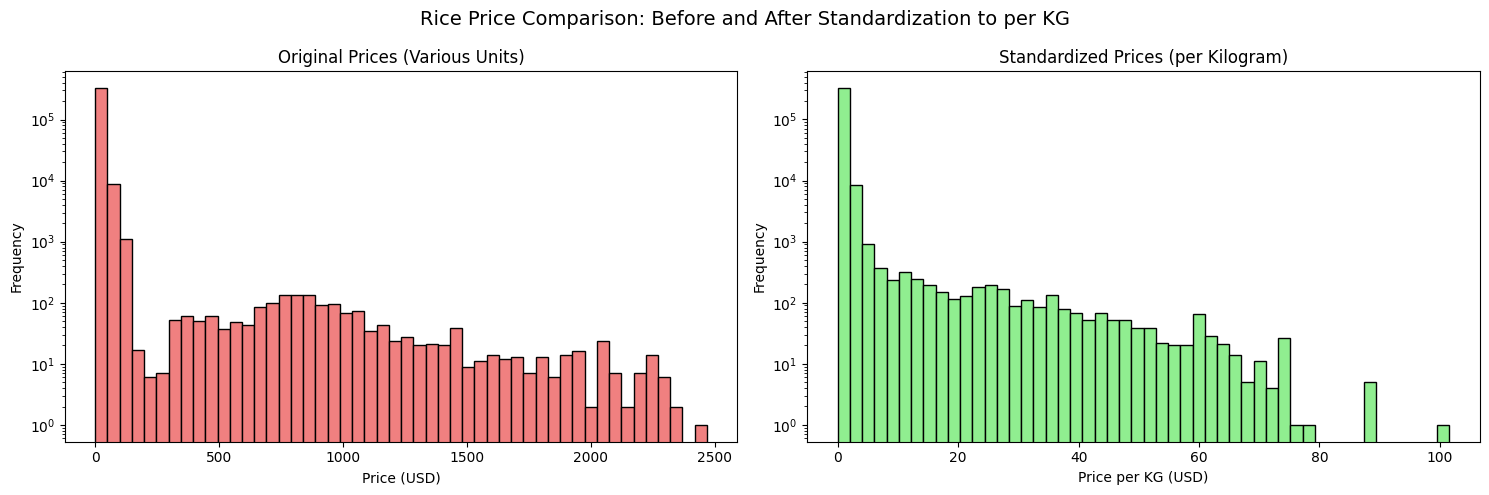

In [71]:
# Create a function to convert all units to kilograms
def convert_to_kg(unit):
    """Convert various units to kilograms"""
    unit = str(unit).strip()
    
    # Extract number if present (e.g., "100 KG" -> 100)
    parts = unit.split()
    if len(parts) == 2 and parts[0].replace('.', '').isdigit():
        quantity = float(parts[0])
        unit_type = parts[1].upper()
    else:
        quantity = 1
        unit_type = unit.upper()
    
    # Conversion factors to kilograms
    conversions = {
        'KG': 1,
        'G': 0.001,
        'MT': 1000,  # Metric Ton
        'POUND': 0.453592,
        'POUNDS': 0.453592,
        'LIBRA': 0.453592,  # Spanish/Portuguese pound
        'MARMITE': 2.7,  # not standardised - 6lb = 1 marmite - https://iberoamericana.se/articles/403/files/submission/proof/403-1-769-1-10-20171127.pdf
        'CUARTILLA': 2.875,  # Traditional Spanish unit, ~2.875 - source https://es.wikipedia.org/wiki/Cuartilla_%28unidad_de_masa%29?utm_source=chatgpt.com
    }
    
    # Get conversion factor
    for key, factor in conversions.items():
        if key in unit_type:
            return quantity * factor
    
    # If unit not recognized, return None
    return None

# Apply the conversion
print("Converting units to standardized 'price per KG'...")
print("\nOriginal units and their counts:")
print(df['unit'].value_counts())

# Calculate kilograms from unit
df['kg'] = df['unit'].apply(convert_to_kg)

# Check for any unconverted units
unconverted = df[df['kg'].isna()]
if len(unconverted) > 0:
    print("\n" + "="*60)
    print("WARNING: Some units could not be converted:")
    print("="*60)
    print(unconverted['unit'].value_counts())
else:
    print("\n✓ All units successfully converted!")

# Calculate price per kilogram
df['price_per_kg_usd'] = df['price_usd'] / df['kg']

# Remove rows with invalid conversions (if any)
df_clean = df[df['kg'].notna()].copy()

print("\n" + "="*60)
print("CONVERSION COMPLETE")
print("="*60)
print(f"Total records after conversion: {len(df_clean):,}")
print(f"\nNew column: 'price_per_kg_usd'")
print(f"\nPrice per KG statistics:")
print(df_clean['price_per_kg_usd'].describe())

# Show some examples
print("\n" + "="*60)
print("SAMPLE CONVERSIONS (first 10 rows):")
print("="*60)
print(df_clean[['commodity', 'unit', 'price_usd', 'kg', 'price_per_kg_usd']].head(10))

# Visualize the standardized prices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original prices
axes[0].hist(df_clean['price_usd'], bins=50, edgecolor='black', color='lightcoral')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Prices (Various Units)')
axes[0].set_yscale('log')

# Standardized prices per KG
axes[1].hist(df_clean['price_per_kg_usd'], bins=50, edgecolor='black', color='lightgreen')
axes[1].set_xlabel('Price per KG (USD)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Standardized Prices (per Kilogram)')
axes[1].set_yscale('log')

plt.suptitle('Rice Price Comparison: Before and After Standardization to per KG', fontsize=14)
plt.tight_layout()
plt.show()

# Update df to the cleaned version
df = df_clean

In [72]:
df.sort_values(by='price_per_kg_usd', ascending=False)


,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd,kg,price_per_kg_usd
2558593,SOM,2023-12-15,Bakool,Rab Dhuure,Rab Dhuure,6625,4.35,43.16,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SOS,57703.23,101.59,1.0,101.59
2557352,SOM,2023-08-15,Mudug,Hobyo,Hobyo,6602,5.35,48.53,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SOS,50000.00,88.34,1.0,88.34
2556982,SOM,2023-07-15,Mudug,Hobyo,Hobyo,6602,5.35,48.53,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SOS,50000.00,88.34,1.0,88.34
854277,ETH,2018-06-15,Somali,GODE,Gode,460,6.02,43.13,cereals and tubers,Rice (imported),64,KG,actual,Retail,ETB,2400.00,88.04,1.0,88.04
2557721,SOM,2023-09-15,Mudug,Hobyo,Hobyo,6602,5.35,48.53,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SOS,50000.00,88.03,1.0,88.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072733,SOM,2025-08-15,Awdal,Borama,Borama,1413,9.94,43.18,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SLS,9000.00,NaN,1.0,NaN
3073018,SOM,2025-08-15,Sanaag,Ceerigaabo,Ceerigaabo,1416,10.62,47.37,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SLS,9000.00,NaN,1.0,NaN
3073088,SOM,2025-08-15,Togdheer,Burco,Burco,1415,9.53,45.54,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SLS,9000.00,NaN,1.0,NaN
3073101,SOM,2025-08-15,Woqooyi Galbeed,Berbera,Berbera,1412,10.44,45.01,cereals and tubers,Rice (imported),64,KG,aggregate,Retail,SLS,9000.00,NaN,1.0,NaN


In [73]:
# Investigate high prices - check if conversion is correct
print("="*60)
print("INVESTIGATING HIGH PRICES (>$10/KG)")
print("="*60)

# Look at records with high price per kg
high_prices = df[df['price_per_kg_usd'] > 10].sort_values('price_per_kg_usd', ascending=False)

print(f"\nFound {len(high_prices)} records with price > $10/kg")
print("\nTop 20 highest prices per kg:")
print(high_prices[['country_code', 'commodity', 'unit', 'price_usd', 'kg', 'price_per_kg_usd', 'date']].head(20))

# Check the conversion logic for a few examples
print("\n" + "="*60)
print("MANUAL VERIFICATION OF CONVERSIONS:")
print("="*60)

sample = high_prices.head(5)
for idx, row in sample.iterrows():
    print(f"\nUnit: {row['unit']}")
    print(f"  Original price: ${row['price_usd']:.2f}")
    print(f"  Converted to KG: {row['kg']}")
    print(f"  Price per KG: ${row['price_per_kg_usd']:.2f}")
    print(f"  Math check: ${row['price_usd']:.2f} / {row['kg']} = ${row['price_usd']/row['kg']:.2f}")
    print(f"  Country: {row['country_code']}, Date: {row['date']}")

# Check if certain units are being converted incorrectly
print("\n" + "="*60)
print("PRICE PER KG BY UNIT TYPE:")
print("="*60)
price_by_unit = df.groupby('unit')['price_per_kg_usd'].agg(['count', 'mean', 'median', 'min', 'max'])
print(price_by_unit.sort_values('mean', ascending=False))

# Check reasonable price range (typical rice: $0.50 - $3 per kg)
print("\n" + "="*60)
print("PRICE DISTRIBUTION ANALYSIS:")
print("="*60)
print(f"Records with price < $0.10/kg: {len(df[df['price_per_kg_usd'] < 0.10]):,}")
print(f"Records with price $0.10-$3/kg (reasonable): {len(df[(df['price_per_kg_usd'] >= 0.10) & (df['price_per_kg_usd'] <= 3)]):,}")
print(f"Records with price $3-$10/kg (high): {len(df[(df['price_per_kg_usd'] > 3) & (df['price_per_kg_usd'] <= 10)]):,}")
print(f"Records with price > $10/kg (very high): {len(df[df['price_per_kg_usd'] > 10]):,}")

INVESTIGATING HIGH PRICES (>$10/KG)

Found 2810 records with price > $10/kg

Top 20 highest prices per kg:
        country_code                    commodity unit  price_usd   kg  \
2558593          SOM              Rice (imported)   KG     101.59  1.0   
2556982          SOM              Rice (imported)   KG      88.34  1.0   
2557352          SOM              Rice (imported)   KG      88.34  1.0   
854277           ETH              Rice (imported)   KG      88.04  1.0   
2557721          SOM              Rice (imported)   KG      88.03  1.0   
2558092          SOM              Rice (imported)   KG      88.03  1.0   
2875463          SOM              Rice (imported)   KG      78.87  1.0   
2671159          CMR  Rice (long grain, imported)   KG      76.40  1.0   
2873762          SOM              Rice (imported)   KG      75.12  1.0   
3070617          SOM              Rice (imported)   KG      74.82  1.0   
3070236          SOM              Rice (imported)   KG      74.82  1.0   
28756

In [74]:
df= df[df['price_per_kg_usd'] <= 5.0]

In [75]:
# Investigate high prices - check if conversion is correct
print("="*60)
print("INVESTIGATING HIGH PRICES (>$10/KG)")
print("="*60)

# Look at records with high price per kg
high_prices = df[df['price_per_kg_usd'] > 10].sort_values('price_per_kg_usd', ascending=False)

print(f"\nFound {len(high_prices)} records with price > $10/kg")
print("\nTop 20 highest prices per kg:")
print(high_prices[['country_code', 'commodity', 'unit', 'price_usd', 'kg', 'price_per_kg_usd', 'date']].head(20))

# Check the conversion logic for a few examples
print("\n" + "="*60)
print("MANUAL VERIFICATION OF CONVERSIONS:")
print("="*60)

sample = high_prices.head(5)
for idx, row in sample.iterrows():
    print(f"\nUnit: {row['unit']}")
    print(f"  Original price: ${row['price_usd']:.2f}")
    print(f"  Converted to KG: {row['kg']}")
    print(f"  Price per KG: ${row['price_per_kg_usd']:.2f}")
    print(f"  Math check: ${row['price_usd']:.2f} / {row['kg']} = ${row['price_usd']/row['kg']:.2f}")
    print(f"  Country: {row['country_code']}, Date: {row['date']}")

# Check if certain units are being converted incorrectly
print("\n" + "="*60)
print("PRICE PER KG BY UNIT TYPE:")
print("="*60)
price_by_unit = df.groupby('unit')['price_per_kg_usd'].agg(['count', 'mean', 'median', 'min', 'max'])
print(price_by_unit.sort_values('mean', ascending=False))

# Check reasonable price range (typical rice: $0.50 - $3 per kg)
print("\n" + "="*60)
print("PRICE DISTRIBUTION ANALYSIS:")
print("="*60)
print(f"Records with price < $0.10/kg: {len(df[df['price_per_kg_usd'] < 0.10]):,}")
print(f"Records with price $0.10-$3/kg (reasonable): {len(df[(df['price_per_kg_usd'] >= 0.10) & (df['price_per_kg_usd'] <= 3)]):,}")
print(f"Records with price $3-$5/kg (high): {len(df[(df['price_per_kg_usd'] > 3) & (df['price_per_kg_usd'] <= 5)]):,}")
print(f"Records with price > $10/kg (very high): {len(df[df['price_per_kg_usd'] > 10]):,}")

INVESTIGATING HIGH PRICES (>$10/KG)

Found 0 records with price > $10/kg

Top 20 highest prices per kg:
Empty DataFrame
Columns: [country_code, commodity, unit, price_usd, kg, price_per_kg_usd, date]
Index: []

MANUAL VERIFICATION OF CONVERSIONS:

PRICE PER KG BY UNIT TYPE:
             count      mean    median       min       max
unit                                                      
5 KG           132  4.234561  4.323000  3.176000  4.992000
900 G          351  2.412029  2.466667  0.922222  5.000000
4.5 KG           8  1.627778  1.633333  1.526667  1.737778
Pound         2003  1.483251  1.190497  0.573202  3.373075
2.8 KG        2344  1.404841  1.339286  0.217857  3.632143
500 G          504  1.385079  1.380000  0.720000  2.020000
Marmite       1607  1.323425  1.196296  0.611111  3.977778
Cuartilla      152  1.109817  1.154783  0.824348  1.307826
25 KG         2319  1.060131  0.943200  0.072800  2.014800
2.7 KG        2612  1.007331  0.962963  0.507407  3.792593
Libra          57

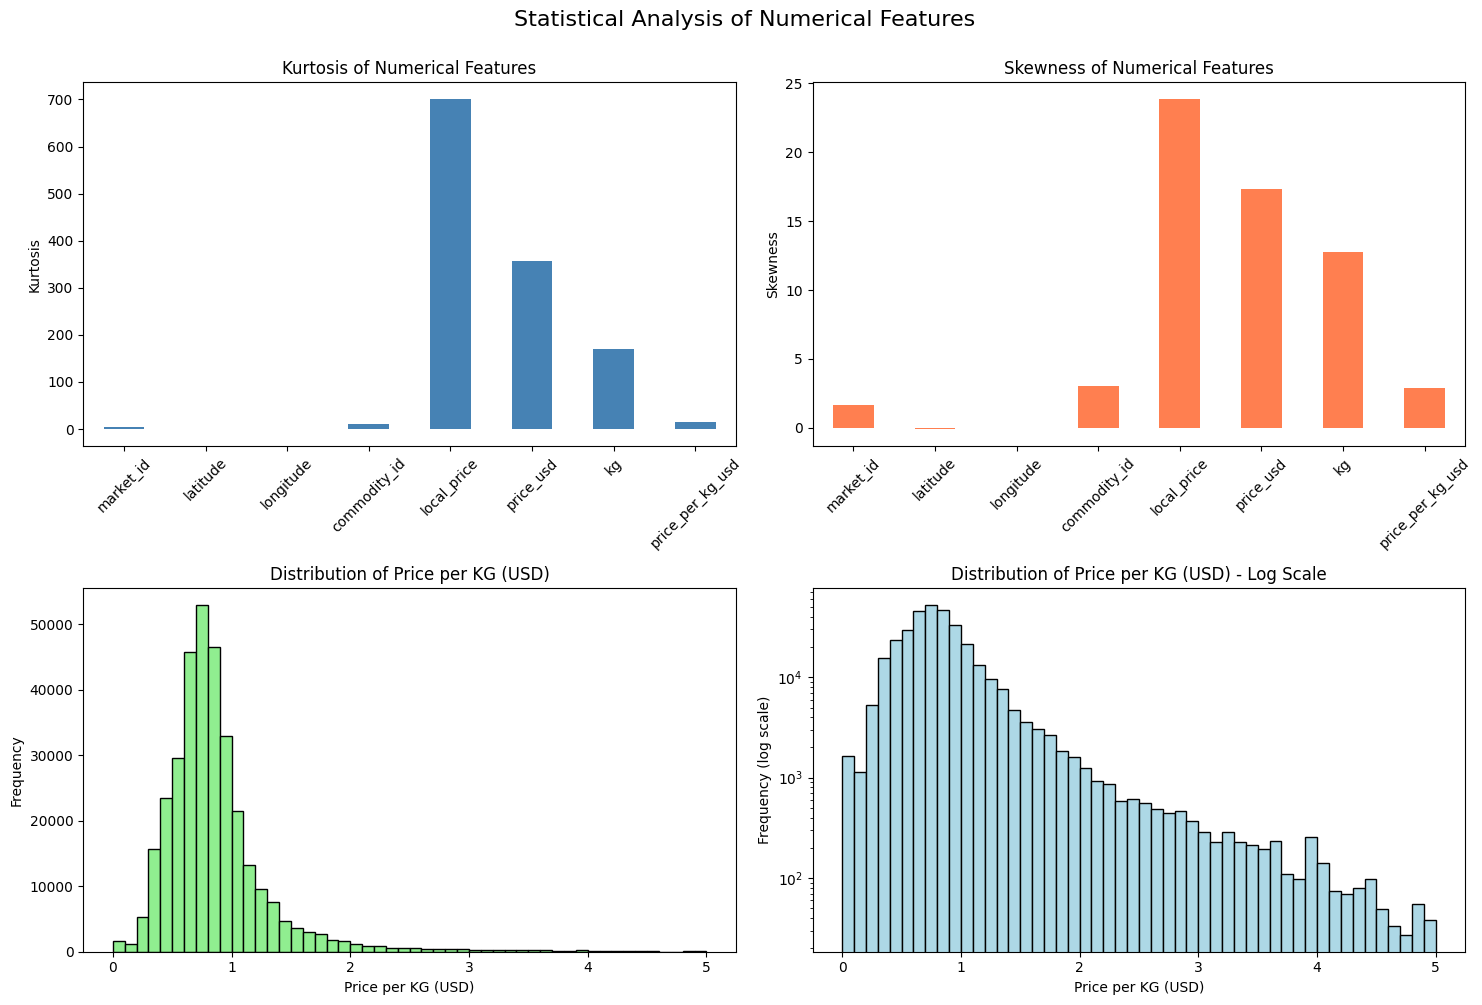

In [76]:
# Create subplots for statistical distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Kurtosis
df.kurtosis(numeric_only=True).plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Kurtosis of Numerical Features')
axes[0, 0].set_ylabel('Kurtosis')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Skewness
df.skew(numeric_only=True).plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Skewness of Numerical Features')
axes[0, 1].set_ylabel('Skewness')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Histogram of price_per_kg_usd
axes[1, 0].hist(df['price_per_kg_usd'], bins=50, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Distribution of Price per KG (USD)')
axes[1, 0].set_xlabel('Price per KG (USD)')
axes[1, 0].set_ylabel('Frequency')

# 4. Histogram with log scale (better for skewed data)
axes[1, 1].hist(df['price_per_kg_usd'], bins=50, edgecolor='black', color='lightblue')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Distribution of Price per KG (USD) - Log Scale')
axes[1, 1].set_xlabel('Price per KG (USD)')
axes[1, 1].set_ylabel('Frequency (log scale)')

plt.suptitle('Statistical Analysis of Numerical Features', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

In [77]:
df = df.dropna()

In [78]:
# Save the cleaned and processed dataframe to CSV
output_path = '/Users/hjama/ai-learning/rpp/data/processed/rice_prices_cleaned.csv'
df.to_csv(output_path, index=False)


print(f"File saved to: {output_path}")
print(f"Total records saved: {len(df):,}")
print(f"\nDataframe shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

File saved to: /Users/hjama/ai-learning/rpp/data/processed/rice_prices_cleaned.csv
Total records saved: 332,022

Dataframe shape: (332022, 19)
Columns: ['country_code', 'date', 'county', 'subcounty', 'market', 'market_id', 'latitude', 'longitude', 'category', 'commodity', 'commodity_id', 'unit', 'price_flag', 'price_type', 'currency', 'local_price', 'price_usd', 'kg', 'price_per_kg_usd']
